In [ ]:
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.cluster import KMeans ,AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

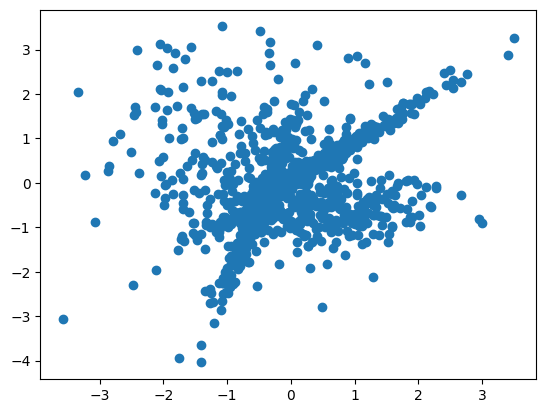

In [ ]:
# demo data generation
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, class_sep=0.5, random_state=42)
#X = np.random.rand(500, 2)
# Plot the data points with different colors for each cluster
plt.scatter(X[:, 0], X[:, 1],)

In [ ]:
def kmeans_clustering(data, k):
   kmeans = KMeans(n_clusters=k, random_state=42)
   labels = kmeans.fit_predict(data)
   return labels

In [ ]:
def plot_base_solution(base_cluster_solutions,data):
  plt.figure(figsize=(15, 4))
  for i, labels in enumerate(base_cluster_solutions, 1):
      plt.subplot(1, len(base_cluster_solutions), i)
      plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
      plt.title(f'Base Clustering {i}')

  #plt.tight_layout()
  plt.show()


In [ ]:
def probability_same_group(N, G):
    total_ways = N * (N - 1) / 2
    same_group_ways = G * math.comb(N // G, 2)
    return same_group_ways / total_ways

In [ ]:
def calculate_co_association_probability(base_cluster_solutions):

  n_data =  len(base_cluster_solutions[0])
  n_clusters =  len(base_cluster_solutions)

  # Create the co-association matrix
  co_assoc_matrix = np.zeros((n_data, n_data))

  co_assoc_matrix = np.zeros((n_data, n_data))
  for i in range(n_data):
      for j in range(i, n_data):
        for k in range(n_clusters):
          if base_cluster_solutions[k][i] == base_cluster_solutions[k][j]:
            co_assoc_matrix[i][j] += (pro_value[k])
            co_assoc_matrix[j][i] += (pro_value[k])
          else:
            co_assoc_matrix[i][j] += 1
            co_assoc_matrix[j][i] += 1

  return co_assoc_matrix

In [ ]:
def calculate_co_association_co_occur(base_cluster_solutions):

  n_data =  len(base_cluster_solutions[0])
  n_clusters =  len(base_cluster_solutions)

  # Create the co-association matrix
  co_assoc_matrix = np.zeros((n_data, n_data))

  co_assoc_matrix = np.zeros((n_data, n_data))
  for i in range(n_data):
      for j in range(i, n_data):
          val = sum(base_cluster_solutions[k][i] == base_cluster_solutions[k][j] for k in range(n_clusters))
          co_assoc_matrix[i][j] = co_assoc_matrix[j][i] = val

  # normalize
  co_assoc_matrix = co_assoc_matrix / n_clusters

  return co_assoc_matrix

In [ ]:
def final_clustering_solution(distance_co_assoc_matrix,data,n_clusters):
    hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='average')
    final_labels = hc.fit_predict(distance_co_assoc_matrix)

    plt.figure(figsize=(6, 6))
    plt.scatter(data[:, 0], data[:, 1], c=final_labels, cmap='viridis')
    plt.title('Final Clustering Solution')
    plt.show()
    return final_labels

In [ ]:
base_cluster_solutions = []
k_values = [2, 3, 4, 5, 6, 7, 8] # no. of base clustering solution with different k
pro_value = []

for k in k_values:
  base_cluster_solutions.append(kmeans_clustering(X, k))

for i in k_values:
  pro_value.append(probability_same_group(len(base_cluster_solutions[0]),i))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

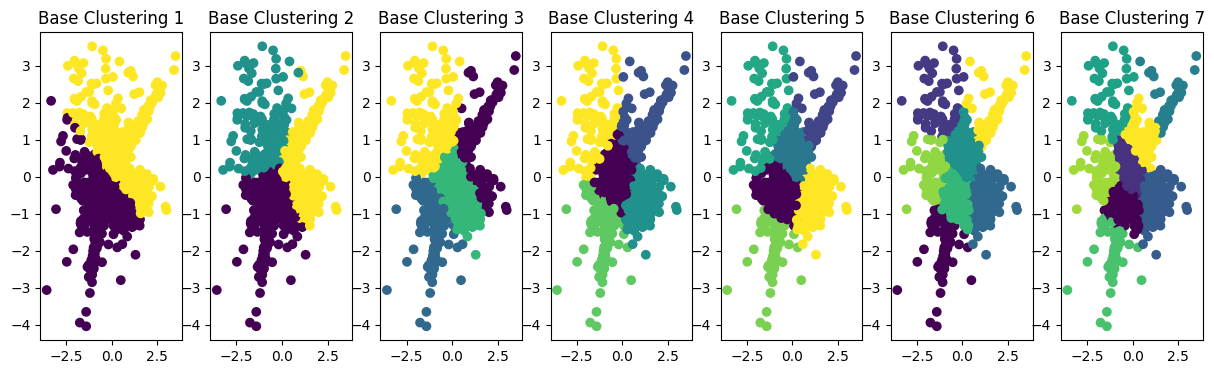

In [ ]:
plot_base_solution(base_cluster_solutions,X)

In [ ]:
# co-association matrix calculation probability
co_assoc_matrix_probability = calculate_co_association_probability(base_cluster_solutions);

In [ ]:
#co-association matrix calculation based on co occurrence count
co_assoc_matrix_co_occur = calculate_co_association_co_occur(base_cluster_solutions)
co_assoc_matrix_co_occur = 1 - co_assoc_matrix_co_occur

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


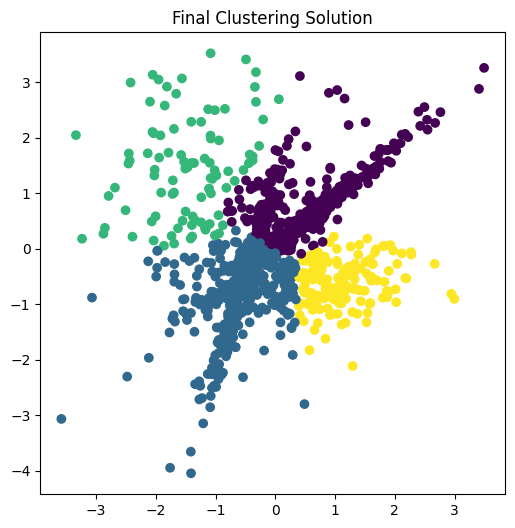

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


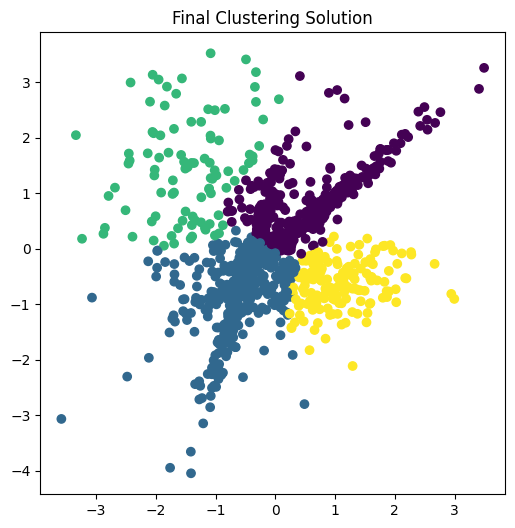

In [ ]:
p_lables =  final_clustering_solution(co_assoc_matrix_probability,X,4)
c_lables = final_clustering_solution(co_assoc_matrix_co_occur,X,4)


In [ ]:
print("Silhouette Score:") # ranges from -1 (worst) to 1 (best)
print("for p ->", silhouette_score(X,p_lables))
print("for c ->", silhouette_score(X,c_lables))
print("Calinski-Harabasz Score:") # Higher values indicate better separation.
print("for p ->",calinski_harabasz_score(X, p_lables))
print("for c ->",calinski_harabasz_score(X, c_lables))
print("Davies-Bouldin Score:") # Lower values indicate better separation
print("for p ->", davies_bouldin_score(X, p_lables))
print("for c ->", davies_bouldin_score(X, c_lables))



Silhouette Score:
for p -> 0.3742722342328153
for c -> 0.3729342057678722
Calinski-Harabasz Score:
for p -> 558.5601672887391
for c -> 558.3163091216213
Davies-Bouldin Score:
for p -> 0.8659150761928749
for c -> 0.8733284267272675
